<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#OTU-rep-seqs" data-toc-modified-id="OTU-rep-seqs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>OTU rep seqs</a></span></li><li><span><a href="#Blastn-run" data-toc-modified-id="Blastn-run-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Blastn run</a></span></li><li><span><a href="#Parsing-blast-results" data-toc-modified-id="Parsing-blast-results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Parsing blast results</a></span><ul class="toc-item"><li><span><a href="#Adding-taxonomy" data-toc-modified-id="Adding-taxonomy-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Adding taxonomy</a></span></li></ul></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summarizing</a></span><ul class="toc-item"><li><span><a href="#Number-of-OTUs-lacking-&gt;=97%-seqID-hit" data-toc-modified-id="Number-of-OTUs-lacking->=97%-seqID-hit-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Number of OTUs lacking &gt;=97% seqID hit</a></span></li><li><span><a href="#Which-taxonomic-groups?" data-toc-modified-id="Which-taxonomic-groups?-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Which taxonomic groups?</a></span></li></ul></li><li><span><a href="#Combining-results-with-living-tree" data-toc-modified-id="Combining-results-with-living-tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Combining results with living tree</a></span><ul class="toc-item"><li><span><a href="#Loading-LTP-blastn-results" data-toc-modified-id="Loading-LTP-blastn-results-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Loading LTP blastn results</a></span></li><li><span><a href="#Combining-tables" data-toc-modified-id="Combining-tables-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Combining tables</a></span></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Summarizing</a></span><ul class="toc-item"><li><span><a href="#Number-of-OTUs-lacking-&gt;=-97%-rep" data-toc-modified-id="Number-of-OTUs-lacking->=-97%-rep-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Number of OTUs lacking &gt;= 97% rep</a></span></li><li><span><a href="#Which-taxonomic-groups?" data-toc-modified-id="Which-taxonomic-groups?-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Which taxonomic groups?</a></span></li><li><span><a href="#Prevalence-of-OTUs-lacking-cultures" data-toc-modified-id="Prevalence-of-OTUs-lacking-cultures-8.3.3"><span class="toc-item-num">8.3.3&nbsp;&nbsp;</span>Prevalence of OTUs lacking cultures</a></span><ul class="toc-item"><li><span><a href="#Adding-total-number-of-OTUs" data-toc-modified-id="Adding-total-number-of-OTUs-8.3.3.1"><span class="toc-item-num">8.3.3.1&nbsp;&nbsp;</span>Adding total number of OTUs</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Conduct a blastn analysis of all OTUs vs the SILVA db to determine which OTUs have no sequenced representative (cultured or uncultured)

# Var

In [103]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/seq_strain_similarity/'
tmp_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp/'

physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

rep_seq_qza_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/rep-seqs_merged_filt_r5k.qza'

SILVA_blast_db_file = '/ebio/abt3_projects/databases_no-backup/SILVA/SILVA_132_QIIME_release/rep_set/rep_set_16S_only/99/silva_132_99_16S.fna'

# params
hit_len_cutoff = 0.95   # fraction of query that must be aligned to subject
threads = 24

# Init

In [104]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 

In [105]:
# slower qsub job wait interval
options(future.wait.interval = 2.0)

In [106]:
make_dir(work_dir)
make_dir(tmp_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/seq_strain_similarity/ 
Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp/ 


# OTU rep seqs

In [107]:
# writing out OTU rep seqs to temp dir
cmd = 'qiime tools export %s --output-dir %s'
cmd = sprintf(cmd, rep_seq_qza_file, tmp_dir)
bash_job(cmd, conda_env='qiime2-2018.6')

character(0)

In [108]:
# checking out file
dna_seq_file = file.path(tmp_dir, 'dna-sequences.fasta')
file.info(dna_seq_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp//dna-sequences.fasta,8721481,FALSE,644,2018-11-29 15:54:13,2018-11-29 15:54:25,2018-11-29 15:54:13,6354,353,nyoungblut,abt3


# Blastn run

In [109]:
blast_out_file = file.path(work_dir, 'rep-seqs_merged_filt_r5k_blastn-SILVA.txt')
blast_out_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/seq_strain_similarity//rep-seqs_merged_filt_r5k_blastn-SILVA.txt"

In [ ]:
outfmt = '\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\"'
cmd = 'blastn -query %s -subject %s -out %s -evalue 1e-5 -num_threads %s -outfmt %s'
cmd = sprintf(cmd, dna_seq_file, SILVA_blast_db_file, blast_out_file, threads, outfmt)
cmd

In [ ]:
# running blast job
bash_job(cmd, conda_env='py3_genome')

In [ ]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S/1_LLA/11b_closest_seqs.ipynb')

In [110]:
# output file
file.info(blast_out_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/seq_strain_similarity//rep-seqs_merged_filt_r5k_blastn-SILVA.txt,1590513359,FALSE,644,2018-11-15 14:40:12,2018-11-15 14:40:12,2018-11-15 09:33:25,6354,353,nyoungblut,abt3


# Parsing blast results

**Length cutoff:** `Match alignment length is >=95 % length of query`

In [111]:
# load table
blast_res = data.table::fread(blast_out_file, sep='\t') %>%
    filter(V4 / V7 >= hit_len_cutoff,
           V3 >= 85)
colnames(blast_res) = c(
    'qaccver',
    'saccver',
    'pident',
    'length',
    'mismatch',
    'gapopen',
    'qlen',
    'qstart',
    'qend',
    'slen',
    'sstart',
    'send',
    'evalue')
blast_res %>% dfhead

[1] 14693836       13


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue
0001fc475a4ad532d85da4d26068f1ec,HM308015.1.1358,89.956,229,19,4,230,1,227,1358,525,751,7.07e-78
0001fc475a4ad532d85da4d26068f1ec,EF097211.1.1400,89.956,229,19,4,230,1,227,1398,545,771,7.07e-78
0001fc475a4ad532d85da4d26068f1ec,CR933231.1.1286,89.177,231,24,1,230,1,230,1286,454,684,3.29e-76


## Adding taxonomy

In [112]:
tax = physeq_file %>%
    readRDS() %>%
    tax_table() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(OTU = rownames(.)) %>%
    dplyr::select(-Species)

tax %>% dfhead

[1] 30290     7


Domain,Phylum,Class,Order,Family,Genus,OTU
Bacteria,Candidate division SR1,unclassified,unclassified,unclassified,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1,uncultured bacterium,,,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1,uncultured bacterium,,,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [113]:
blast_res = blast_res %>%
    inner_join(tax, c('qaccver'='OTU'))
tax = NULL

blast_res %>% dfhead

[1] 12345973       19


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue,Domain,Phylum,Class,Order,Family,Genus
0001fc475a4ad532d85da4d26068f1ec,HM308015.1.1358,89.956,229,19,4,230,1,227,1358,525,751,7.07e-78,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
0001fc475a4ad532d85da4d26068f1ec,EF097211.1.1400,89.956,229,19,4,230,1,227,1398,545,771,7.07e-78,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
0001fc475a4ad532d85da4d26068f1ec,CR933231.1.1286,89.177,231,24,1,230,1,230,1286,454,684,3.29e-76,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella


# Summarizing

## Number of OTUs lacking >=97% seqID hit

In [114]:
total_OTUs = 30290
cat('Total number of OTUs in the dataset:', total_OTUs, '\n')

Total number of OTUs in the dataset: 30290 


In [115]:
# max perc seqID of query
blast_res_s = blast_res %>%
    group_by(Domain, Phylum, Class, Order, Family, Genus, qaccver) %>%
    summarize(max_pident = max(pident)) %>%
    ungroup() 

blast_res_s$max_pident %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.11   96.97   98.70   98.06   99.57  100.00 

In [116]:
# filtering blast results
blast_res_s_s = blast_res_s %>%
    filter(max_pident < 97) %>%
    group_by(Domain, Phylum, Class, Order, Family, Genus) %>%
    summarize(n=n()) %>%
    ungroup()

blast_res_s_s$n %>% sum

[1] 7077

In [117]:
#' OTUs with a hit at specific seqID cutoff
otus_with_rep = function(seqid_cutoff, blast_res_s){
    blast_res_s %>%
        filter(max_pident < seqid_cutoff) %>%
        .$qaccver %>% unique %>% length
}

In [118]:
# checking multiple seqID cutoffs
seqID_cutoff = 85:100
n_remain = sapply(seqID_cutoff, otus_with_rep, blast_res_s=blast_res_s)

df = data.frame(seqID_cutoff = seqID_cutoff,
                n_OTUs = n_remain) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    arrange(-seqID_cutoff)

df

seqID_cutoff,n_OTUs,perc_OTUs_with_hit,perc_OTUs_without_hit
100,20784,31.38329,68.61670518
99,14436,52.34071,47.65929350
98,10207,66.30241,33.69758996
97,7077,76.63585,23.36414658
96,3992,86.82073,13.17926708
95,2695,91.10267,8.89732585
94,1793,94.08055,5.91944536
93,1003,96.68868,3.31132387
92,651,97.85078,2.14922417
91,435,98.56388,1.43611753


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-SILVA_nOTU.pdf 


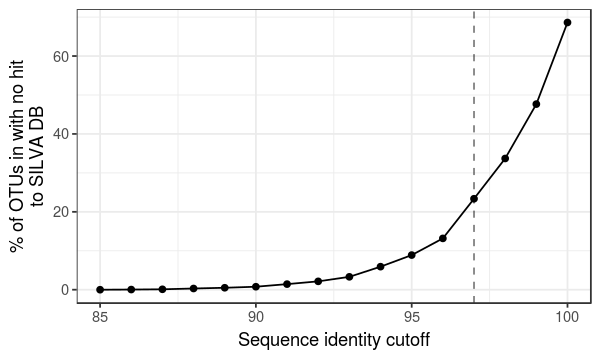

In [119]:
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    labs(x='Sequence identity cutoff',
         y='% of OTUs in with no hit\nto SILVA DB') +
    theme_bw() 

options(repr.plot.width=5, repr.plot.height=3)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-SILVA_nOTU.pdf')

## Which taxonomic groups?

In [120]:
#' OTUs with a hit
otus_with_rep = function(seqid_cutoff, blast_res_s){
    x = blast_res_s %>%
        filter(max_pident < seqid_cutoff) %>%
        distinct(Phylum, qaccver) %>%
        group_by(Phylum) %>%
        summarize(n_OTUs = n()) %>%
        ungroup()
    x$seqID_cutoff = seqid_cutoff
    return(x)
}

In [121]:
seqID_cutoff = 86:100
df = lapply(as.list(seqID_cutoff), 
                  otus_with_rep, 
                  blast_res_s=blast_res_s) %>%
    do.call(rbind, .) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    group_by(Phylum) %>%
    mutate(max_n_OTUs = max(n_OTUs)) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(max_n_OTUs < 200, 'Other', Phylum))

tmp = df %>%
    filter(seqID_cutoff == 86) %>%
    mutate(perc_OTUs_with_hit = 100,
           seqID_cutoff = 85,
           perc_OTUs_without_hit = 0)

df = rbind(df, tmp)

df %>% dfhead

[1] 261   6


Phylum,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Bacteroidetes,7,86,99.97689,0.023109937,3741
Firmicutes,2,86,99.99340,0.006602839,12590
Proteobacteria,4,86,99.98679,0.013205678,870


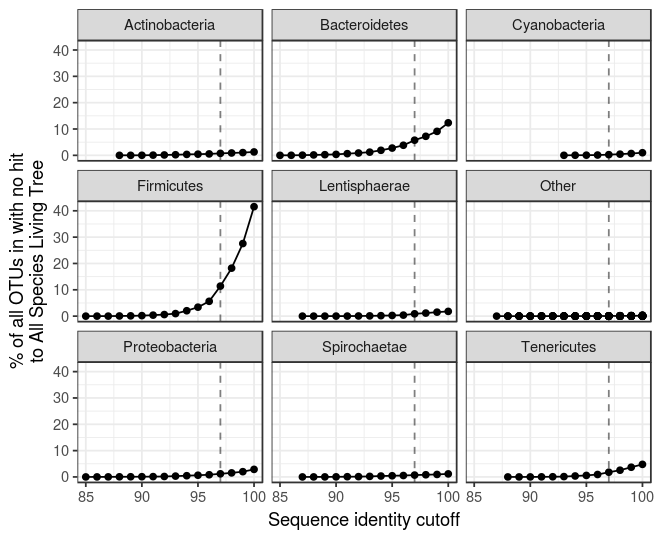

In [122]:
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    facet_wrap(~ Phylum) +
    labs(x='Sequence identity cutoff',
         y='% of all OTUs in with no hit\nto All Species Living Tree') +
    theme_bw() 

options(repr.plot.width=5.5, repr.plot.height=4.5)
plot(p, file='rep-seqs_merged_filt_r5k_blastn-SILVA_nOTU-byPhylum.pdf')

In [123]:
# breakdown at 97% seqID
df %>%
    filter(seqID_cutoff == 97,
           Phylum != 'Other') %>%
    arrange(-perc_OTUs_without_hit)

Phylum,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Firmicutes,3455,97,88.59360,11.4064048,12590
Bacteroidetes,1742,97,94.24893,5.7510730,3741
Tenericutes,543,97,98.20733,1.7926708,1446
Proteobacteria,363,97,98.80158,1.1984153,870
Lentisphaerae,268,97,99.11522,0.8847805,546
Actinobacteria,226,97,99.25388,0.7461208,390
Spirochaetae,215,97,99.29019,0.7098052,351
Cyanobacteria,78,97,99.74249,0.2575107,299


In [124]:
# breakdown at 90% seqID
df %>%
    filter(seqID_cutoff == 90,
           Phylum != 'Other') %>%
    arrange(-perc_OTUs_without_hit)

Phylum,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Bacteroidetes,109,90,99.64015,0.359854738,3741
Firmicutes,58,90,99.80852,0.191482337,12590
Proteobacteria,27,90,99.91086,0.089138329,870
Spirochaetae,11,90,99.96368,0.036315616,351
Actinobacteria,7,90,99.97689,0.023109937,390
Lentisphaerae,4,90,99.98679,0.013205678,546
Tenericutes,3,90,99.99010,0.009904259,1446


# Combining results with living tree

* which match cultured representatives?
* which match any sequenced representatives?

## Loading LTP blastn results

In [125]:
LTP_blast_out_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/type_strain_similarity//rep-seqs_merged_filt_r5k_blastn-LTP.txt'

# load table
LTP_blast_res = data.table::fread(LTP_blast_out_file, sep='\t') %>%
    filter(V4 / V7 >= hit_len_cutoff,
           V3 >= 85)
colnames(LTP_blast_res) = c(
    'qaccver',
    'saccver',
    'pident',
    'length',
    'mismatch',
    'gapopen',
    'qlen',
    'qstart',
    'qend',
    'slen',
    'sstart',
    'send',
    'evalue')
LTP_blast_res %>% dfhead

[1] 3871318      13


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|FlsEndom\|1459bp\|Porphyromonadaceae\|HF969314,86.344,227,31,0,230,1,227,1459,533,759,6.15e-66
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|PorSomer\|1466bp\|Porphyromonadaceae\|AY968205,85.714,231,31,2,230,1,230,1466,533,762,2.86e-64
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|RikMicr2\|1472bp\|Rikenellaceae\|L16498,85.650,223,32,0,230,1,223,1472,553,775,1.33e-62


In [126]:
# adding taxonomy to LTP blastn results
tax = physeq_file %>%
    readRDS() %>%
    tax_table() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(OTU = rownames(.)) %>%
    dplyr::select(-Species)

tax %>% dfhead

[1] 30290     7


Domain,Phylum,Class,Order,Family,Genus,OTU
Bacteria,Candidate division SR1,unclassified,unclassified,unclassified,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1,uncultured bacterium,,,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1,uncultured bacterium,,,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [127]:
LTP_blast_res = LTP_blast_res %>%
    inner_join(tax, c('qaccver'='OTU'))
tax = NULL

LTP_blast_res %>% dfhead

[1] 3221181      19


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue,Domain,Phylum,Class,Order,Family,Genus
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|FlsEndom\|1459bp\|Porphyromonadaceae\|HF969314,86.344,227,31,0,230,1,227,1459,533,759,6.15e-66,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|PorSomer\|1466bp\|Porphyromonadaceae\|AY968205,85.714,231,31,2,230,1,230,1466,533,762,2.86e-64,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|RikMicr2\|1472bp\|Rikenellaceae\|L16498,85.650,223,32,0,230,1,223,1472,553,775,1.33e-62,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella


## Combining tables

In [128]:
blast_res$query_dataset = 'SILVA'
LTP_blast_res$query_dataset = 'LTP'

blast_res = rbind(blast_res, 
                  LTP_blast_res) 
blast_res %>% dfhead

[1] 15567154       20


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue,Domain,Phylum,Class,Order,Family,Genus,query_dataset
0001fc475a4ad532d85da4d26068f1ec,HM308015.1.1358,89.956,229,19,4,230,1,227,1358,525,751,7.07e-78,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella,SILVA
0001fc475a4ad532d85da4d26068f1ec,EF097211.1.1400,89.956,229,19,4,230,1,227,1398,545,771,7.07e-78,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella,SILVA
0001fc475a4ad532d85da4d26068f1ec,CR933231.1.1286,89.177,231,24,1,230,1,230,1286,454,684,3.29e-76,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella,SILVA


## Summarizing

### Number of OTUs lacking >= 97% rep

In [129]:
total_OTUs = 30290
cat('Total number of OTUs in the dataset:', total_OTUs, '\n')

Total number of OTUs in the dataset: 30290 


In [130]:
# max perc seqID of query
blast_res_s = blast_res %>%
    group_by(Domain, Phylum, Class, Order, Family, Genus, qaccver, query_dataset) %>%
    summarize(max_pident = max(pident)) %>%
    ungroup() 

blast_res_s$max_pident %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.00   92.21   96.96   95.38   99.13  100.00 

In [131]:
#' OTUs with a hit at specific seqID cutoff
otus_with_rep = function(seqid_cutoff, blast_res_s){
    blast_res_s %>%
        filter(max_pident < seqid_cutoff) %>%
        .$qaccver %>% unique %>% length
}

In [132]:
# checking multiple seqID cutoffs
seqID_cutoff = 85:100
n = length(seqID_cutoff)
n_remain_SILVA = sapply(seqID_cutoff, otus_with_rep, 
                        blast_res_s=blast_res_s %>% filter(query_dataset == 'SILVA'))
n_remain_LTP = sapply(seqID_cutoff, otus_with_rep, 
                        blast_res_s=blast_res_s %>% filter(query_dataset == 'LTP'))


df = data.frame(seqID_cutoff = rep(seqID_cutoff, 2),
                n_OTUs = c(n_remain_SILVA, n_remain_LTP),
                dataset = c(rep('SILVA', n), rep('LTP', n))) %>%    
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    arrange(-seqID_cutoff)

df

seqID_cutoff,n_OTUs,dataset,perc_OTUs_with_hit,perc_OTUs_without_hit
100,20784,SILVA,31.38329,68.61670518
100,23379,LTP,22.81611,77.18388907
99,14436,SILVA,52.34071,47.65929350
99,22302,LTP,26.37174,73.62826015
98,10207,SILVA,66.30241,33.69758996
98,21449,LTP,29.18785,70.81214922
97,7077,SILVA,76.63585,23.36414658
97,20332,LTP,32.87554,67.12446352
96,3992,SILVA,86.82073,13.17926708
96,18218,LTP,39.85474,60.14526246


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_nOTU.pdf 


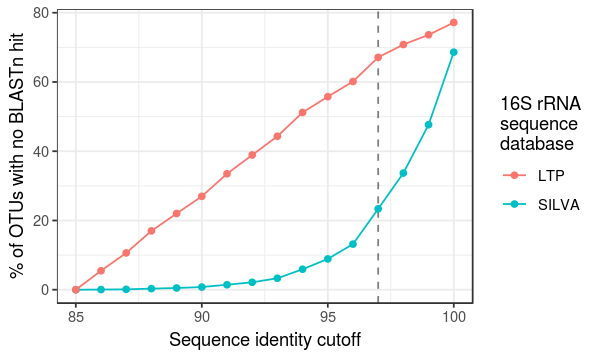

In [133]:
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit, color=dataset)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    scale_color_discrete('16S rRNA\nsequence\ndatabase') +
    labs(x='Sequence identity cutoff',
         y='% of OTUs with no BLASTn hit') +
    theme_bw() 

options(repr.plot.width=5, repr.plot.height=3)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_nOTU.pdf')

### Which taxonomic groups?

In [134]:
#' OTUs with a hit
otus_with_rep = function(seqid_cutoff, blast_res_s, dataset){
    x = blast_res_s %>%
        filter(max_pident < seqid_cutoff) %>%
        distinct(Phylum, qaccver) %>%
        group_by(Phylum) %>%
        summarize(n_OTUs = n()) %>%
        ungroup()
    x$seqID_cutoff = seqid_cutoff
    x$query_dataset = dataset
    return(x)
}

In [135]:
seqID_cutoff = 86:100
L1 = lapply(as.list(seqID_cutoff), 
                    otus_with_rep, 
                    dataset='LTP',
                    blast_res_s=blast_res_s %>% filter(query_dataset == 'LTP'))

L2 = lapply(as.list(seqID_cutoff), 
                    otus_with_rep, 
                    dataset='SILVA',
                    blast_res_s=blast_res_s %>% filter(query_dataset == 'SILVA'))

df = c(L1, L2) %>% 
    do.call(rbind, .) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    group_by(Phylum, query_dataset) %>%
    mutate(max_n_OTUs = max(n_OTUs)) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(max_n_OTUs < 200, 'Other', Phylum))

tmp = df %>%
    filter(seqID_cutoff == 86) %>%
    mutate(perc_OTUs_with_hit = 100,
           seqID_cutoff = 85,
           perc_OTUs_without_hit = 0)

df = rbind(df, tmp)
L1 = L2 = NULL

df %>% dfhead

[1] 605   7


Phylum,n_OTUs,seqID_cutoff,query_dataset,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Actinobacteria,8,86,LTP,99.97359,0.02641136,494
Other,8,86,LTP,99.97359,0.02641136,10
Bacteroidetes,760,86,LTP,97.49092,2.50907890,3886


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_nOTU-byPhylum.pdf 


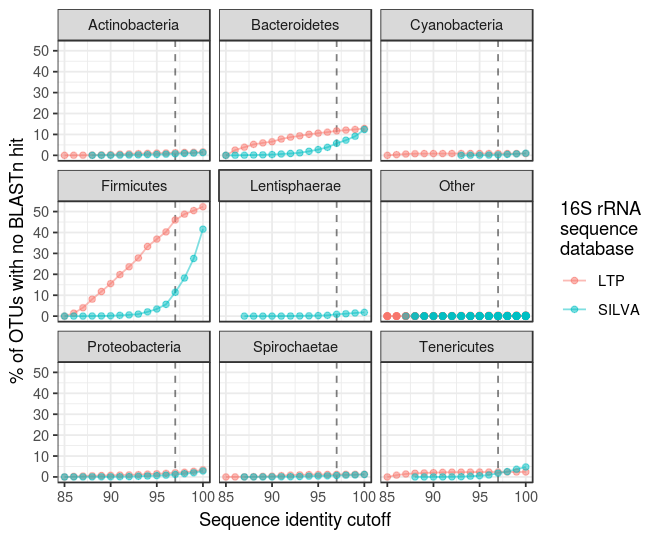

In [136]:
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit, color=query_dataset)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line(alpha=0.5) +
    geom_point(alpha=0.5) +
    scale_color_discrete('16S rRNA\nsequence\ndatabase') +
    facet_wrap(~ Phylum) +
    labs(x='Sequence identity cutoff',
         y='% of OTUs with no BLASTn hit') +
    theme_bw() 

options(repr.plot.width=5.5, repr.plot.height=4.5)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_nOTU-byPhylum.pdf')

In [137]:
# breakdown at 97% seqID
df %>%
    filter(seqID_cutoff == 97,
           Phylum != 'Other') %>%
    arrange(query_dataset, -perc_OTUs_without_hit)

Phylum,n_OTUs,seqID_cutoff,query_dataset,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Firmicutes,13929,97,LTP,54.01453,45.9854738,15854
Bacteroidetes,3540,97,LTP,88.31297,11.6870254,3886
Tenericutes,711,97,LTP,97.65269,2.3473093,726
Proteobacteria,606,97,LTP,97.99934,2.0006603,1042
Actinobacteria,387,97,LTP,98.72235,1.2776494,494
Spirochaetae,366,97,LTP,98.79168,1.2083196,384
Cyanobacteria,259,97,LTP,99.14493,0.8550677,259
Firmicutes,3455,97,SILVA,88.59360,11.4064048,12590
Bacteroidetes,1742,97,SILVA,94.24893,5.7510730,3741
Tenericutes,543,97,SILVA,98.20733,1.7926708,1446


In [138]:
# breakdown at 90% seqID
df %>%
    filter(seqID_cutoff == 90,
           Phylum != 'Other') %>%
    arrange(query_dataset, -perc_OTUs_without_hit)

Phylum,n_OTUs,seqID_cutoff,query_dataset,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Firmicutes,4710,90,LTP,84.45031,15.549686365,15854
Bacteroidetes,1976,90,LTP,93.47639,6.523605150,3886
Tenericutes,620,90,LTP,97.95312,2.046880158,726
Cyanobacteria,252,90,LTP,99.16804,0.831957742,259
Proteobacteria,230,90,LTP,99.24067,0.759326510,1042
Actinobacteria,104,90,LTP,99.65665,0.343347639,494
Spirochaetae,103,90,LTP,99.65995,0.340046220,384
Bacteroidetes,109,90,SILVA,99.64015,0.359854738,3741
Firmicutes,58,90,SILVA,99.80852,0.191482337,12590
Proteobacteria,27,90,SILVA,99.91086,0.089138329,870


### Prevalence of OTUs lacking cultures

In [139]:
# sample metadata 
metadata = physeq_file %>%
    readRDS() %>%
    sample_data() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(Sample = rownames(.)) %>%
    dplyr::select(Sample, class, order, family, genus, scientific_name)

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213   6


Sample,class,order,family,genus,scientific_name
X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber
X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus_caballus
X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus_hemionus


In [140]:
# otu prevalence
otu_prev = physeq_file %>%
    readRDS() %>%
    otu_table() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Count, -OTU) %>%
    mutate(Count = ifelse(Count > 0, 1, 0))

otu_prev %>% dfhead

[1] 6451770       3


OTU,Sample,Count
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [141]:
# host class level prevalence
otu_prev_s = otu_prev %>%
    inner_join(metadata, c('Sample'='Sample')) %>%
    group_by(class, OTU) %>%
    summarize(prev = sum(Count) / length(Count)) %>%
    ungroup()

otu_prev_s %>% dfhead

[1] 151450      3


class,OTU,prev
Actinopterygii,0001fc475a4ad532d85da4d26068f1ec,0
Actinopterygii,0003924139f23b61d50e68466e863de4,0
Actinopterygii,00057660e4817a98b6fad8f00075bf08,0


In [142]:
# joining tables
blast_res_s_j = blast_res_s %>%
    inner_join(otu_prev_s, c('qaccver'='OTU')) 

blast_res_s_j %>% dfhead

[1] 259740     11


Domain,Phylum,Class,Order,Family,Genus,qaccver,query_dataset,max_pident,class,prev
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261,Actinopterygii,0.00000000
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261,Amphibia,0.00000000
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261,Aves,0.03333333


In [143]:
# summarizing by taxonomic group
blast_res_s_j_s = blast_res_s_j %>%
    filter(prev > 0) %>%
    group_by(Phylum, query_dataset) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length,
           prev = prev * 100) %>%
    ungroup() %>%
    mutate(has_culture = max_pident >= 97) %>%
    group_by(Phylum, class, has_culture, qaccver, query_dataset) %>%
    summarize(present = sum(prev) > 0) %>%
    ungroup() %>%
    group_by(Phylum, class, has_culture, query_dataset) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    group_by(Phylum, query_dataset) %>%
    mutate(total_n = sum(n)) %>%
    ungroup() %>%
    filter(total_n > 100)

blast_res_s_j_s %>% dfhead

[1] 179   6


Phylum,class,has_culture,query_dataset,n,total_n
Actinobacteria,Actinopterygii,FALSE,LTP,19,711
Actinobacteria,Actinopterygii,FALSE,SILVA,2,716
Actinobacteria,Actinopterygii,TRUE,LTP,17,711


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_host-prev.pdf 


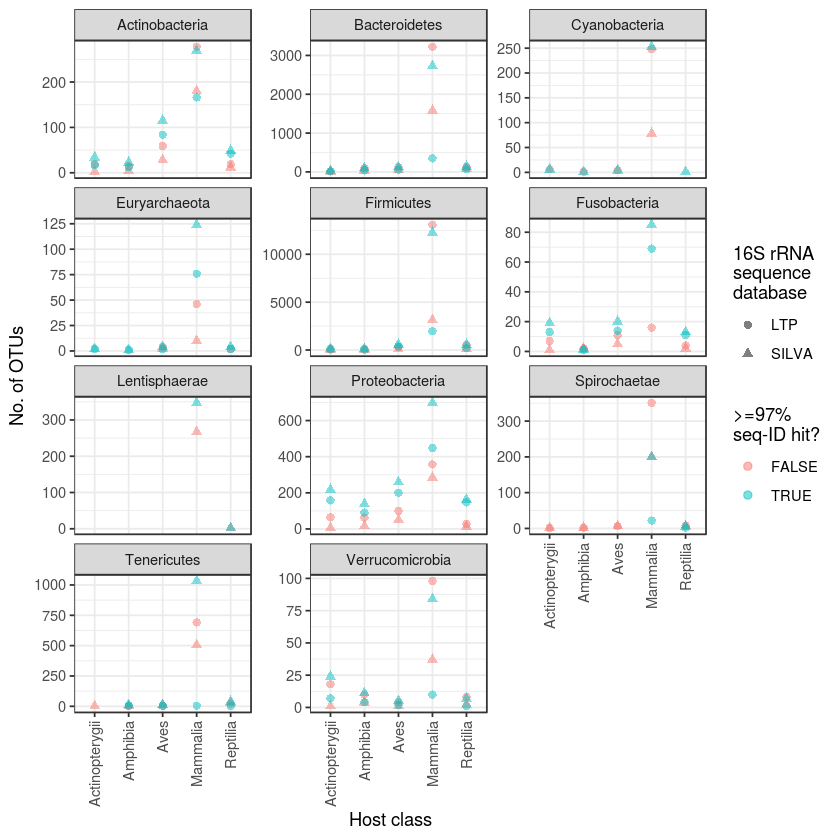

In [144]:
# plotting 
p = ggplot(blast_res_s_j_s, aes(class, n, color=has_culture, shape=query_dataset)) +
    geom_point(alpha=0.5, size=2) +
    scale_color_discrete('>=97%\nseq-ID hit?') +
    scale_shape_discrete('16S rRNA\nsequence\ndatabase') +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='Host class',
         y='No. of OTUs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

options(repr.plot.width=7, repr.plot.height=7)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_host-prev.pdf')

In [145]:
# summarizing by taxonomic group (perc of each phylum)
blast_res_s_j_s = blast_res_s_j %>%
    filter(prev > 0) %>%
    group_by(Phylum, query_dataset) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length,
           prev = prev * 100) %>%
    ungroup() %>%
    mutate(has_culture = max_pident >= 97) %>%
    group_by(Phylum, class, has_culture, qaccver, query_dataset) %>%
    summarize(present = sum(prev) > 0,
              n_OTUs = n_OTUs) %>%
    ungroup() %>%
    group_by(Phylum, class, has_culture, query_dataset) %>%
    summarize(perc_OTUs = n() / first(n_OTUs) * 100,
              n=n()) %>%
    ungroup() %>%
    group_by(Phylum, query_dataset) %>%
    mutate(sum_n = sum(n)) %>%
    ungroup() %>%
    filter(sum_n > 100)

blast_res_s_j_s %>% dfhead

[1] 179   7


Phylum,class,has_culture,query_dataset,perc_OTUs,n,sum_n
Actinobacteria,Actinopterygii,FALSE,LTP,2.848576,19,711
Actinobacteria,Actinopterygii,FALSE,SILVA,0.297619,2,716
Actinobacteria,Actinopterygii,TRUE,LTP,2.548726,17,711


In [146]:
# correct summing of percentages?
blast_res_s_j_s %>%
    group_by(Phylum, query_dataset) %>%
    summarize(sum(perc_OTUs)) %>%
    ungroup()

Phylum,query_dataset,sum(perc_OTUs)
Actinobacteria,LTP,106.5967
Actinobacteria,SILVA,106.5476
Bacteroidetes,LTP,102.2654
Bacteroidetes,SILVA,101.9694
Cyanobacteria,LTP,100.0000
Cyanobacteria,SILVA,100.0000
Euryarchaeota,LTP,100.7463
Euryarchaeota,SILVA,100.6849
Firmicutes,LTP,102.7394
Firmicutes,SILVA,102.6808


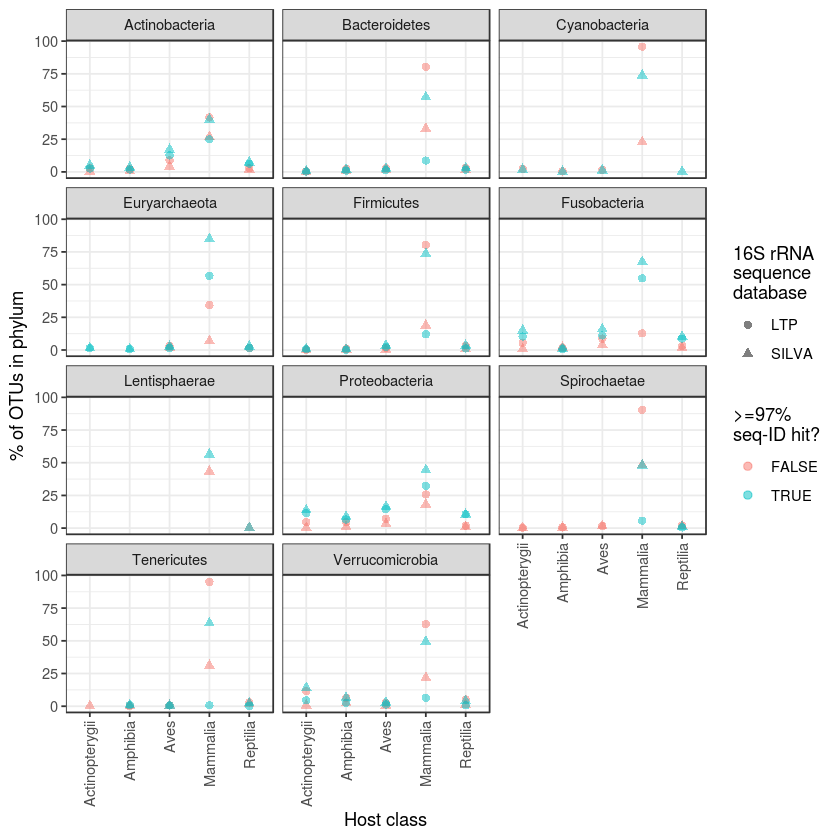

In [147]:
# plotting 
p = ggplot(blast_res_s_j_s, aes(class, perc_OTUs, color=has_culture, shape=query_dataset)) +
    geom_point(alpha=0.5, size=2) +
    scale_color_discrete('>=97%\nseq-ID hit?') +
    scale_shape_discrete('16S rRNA\nsequence\ndatabase') +
    facet_wrap(~ Phylum, ncol=3) +
    labs(x='Host class',
         y='% of OTUs in phylum') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

options(repr.plot.width=7, repr.plot.height=7)
plot(p)
#plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_host-prev_perc.pdf')

#### Adding total number of OTUs

In [148]:
blast_res_s %>% dfhead

[1] 51948     9


Domain,Phylum,Class,Order,Family,Genus,qaccver,query_dataset,max_pident
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,SILVA,98.696
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,6e7341c1e67a4f5dded3f78083f1f5aa,LTP,97.826


In [149]:
# otu prevalence
otu_prev = physeq_file %>%
    readRDS() %>%
    otu_table() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Count, -OTU) %>%
    mutate(Count = ifelse(Count > 0, 1, 0))

otu_prev %>% dfhead

[1] 6451770       3


OTU,Sample,Count
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [150]:
# host class level prevalence
otu_prev_s = otu_prev %>%
    inner_join(metadata, c('Sample'='Sample')) %>%
    group_by(class, OTU) %>%
    summarize(prev = sum(Count) / length(Count)) %>%
    ungroup() %>%
    inner_join(blast_res_s %>% distinct(Domain, Phylum, Class, Order, Family, Genus, qaccver),
               c('OTU'='qaccver'))

otu_prev_s %>% dfhead

[1] 137315      9


class,OTU,prev,Domain,Phylum,Class,Order,Family,Genus
Actinopterygii,0001fc475a4ad532d85da4d26068f1ec,0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
Actinopterygii,0003924139f23b61d50e68466e863de4,0,Bacteria,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,uncultured
Actinopterygii,00057660e4817a98b6fad8f00075bf08,0,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,uncultured


In [151]:
# joining tables
blast_res_s_j = blast_res_s %>%
    left_join(otu_prev_s, c('Domain'='Domain', 
                             'Phylum'='Phylum', 
                             'Class'='Class',
                             'Order'='Order',
                             'Family'='Family',
                             'Genus'='Genus',
                             'qaccver'='OTU')) 

blast_res_s_j %>% dfhead

[1] 259740     11


Domain,Phylum,Class,Order,Family,Genus,qaccver,query_dataset,max_pident,class,prev
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261,Actinopterygii,0.00000000
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261,Amphibia,0.00000000
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,LTP,98.261,Aves,0.03333333


In [152]:
# summarizing records 
blast_res_s_j %>%
    group_by(Class, Order, Family, Genus, qaccver, query_dataset, class) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [153]:
blast_res_s_j_s = blast_res_s_j %>%
    filter(prev > 0) %>%
    mutate(has_culture = max_pident >= 97) %>%
    group_by(Phylum) %>%
    mutate(n_OTUs_per_Phylum = qaccver %>% unique %>% length) %>%
    group_by(Domain, Phylum, class, has_culture, query_dataset, n_OTUs_per_Phylum) %>%
    summarize(n_OTUs = qaccver %>% unique %>% length) %>%
    ungroup() %>%
    filter(n_OTUs_per_Phylum > 100)  

blast_res_s_j_s %>% dfhead

[1] 181   7


Domain,Phylum,class,has_culture,query_dataset,n_OTUs_per_Phylum,n_OTUs
Archaea,Euryarchaeota,Actinopterygii,TRUE,LTP,146,2
Archaea,Euryarchaeota,Actinopterygii,TRUE,SILVA,146,2
Archaea,Euryarchaeota,Amphibia,TRUE,LTP,146,1


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_host-prev_nOTU.pdf 


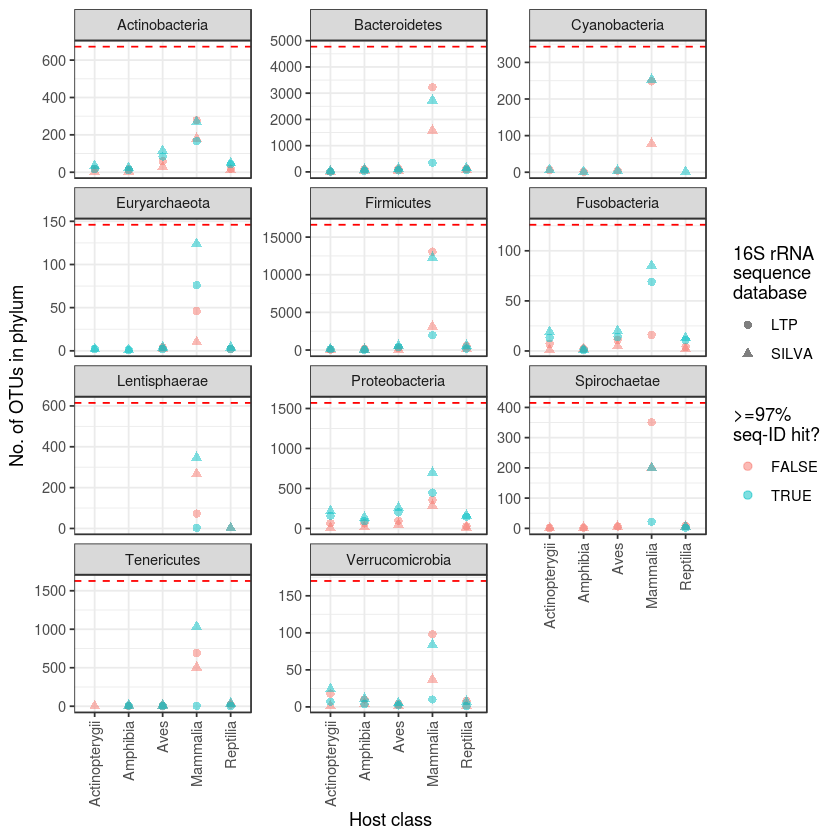

In [154]:
# plotting 
p = ggplot(blast_res_s_j_s, aes(class, n_OTUs, color=has_culture, shape=query_dataset)) +
    geom_point(alpha=0.5, size=2) +
    geom_hline(aes(yintercept=n_OTUs_per_Phylum), 
               color='red', linetype='dashed') +
    scale_color_discrete('>=97%\nseq-ID hit?') +
    scale_shape_discrete('16S rRNA\nsequence\ndatabase') +
    facet_wrap(~ Phylum, ncol=3, scales='free_y') +
    labs(x='Host class',
         y='No. of OTUs in phylum') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

options(repr.plot.width=7, repr.plot.height=7)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP-SILVA_host-prev_nOTU.pdf')

# sessionInfo

In [155]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2  phyloseq_1.22.3 ggplot2_3.0.0   tidyr_0.8.1    
[5] dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        ape_5.1             lattice_0.20-34    
 [4] Biostrings_2.46.0   assertthat_0.2.0    digest_0.6.15      
 [7] foreach_1.4.4       IRdisplay_0.4.4     R6_2.2.2           
[10] plyr_1.8.4          repr_0.15.0         stats4_3.4.1       
[13] evaluate_0.10.1     pillar_1.2.2        zlibbioc_1.24.0    
[16] rlang_0.2.1         lazyeval_0.2.1      uuid_0.1-2         
[19] data.table_